In [13]:
import openpyxl
from matplotlib import pyplot as plt
from collections import defaultdict
battleground = openpyxl.load_workbook('BattleGround.xlsx')

### Killed Data

In [14]:
sheet = battleground['Sheet1']
killed_by = sheet['D5':'E83']
weapon_set = set()
Killed =[]
for weapon,distance in killed_by:
    if distance.value:
        weapon_set.add(weapon.value)
        Killed.append((weapon.value, distance.value))

In [15]:
from collections import defaultdict
weapon_distance = defaultdict(list)
for weapon,distance in Killed:
    weapon_distance[weapon].append(distance)
Killed_list = {weapon:sorted(list(distance)) for weapon, distance in weapon_distance.items()}

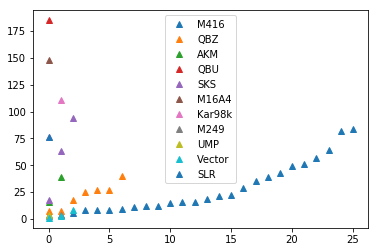

In [16]:
for weapon in Killed_list:
    num = len(Killed_list[weapon])
    plt.plot(range(num), Killed_list[weapon],'^',label = weapon)
plt.legend()  

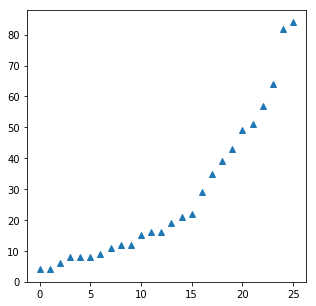

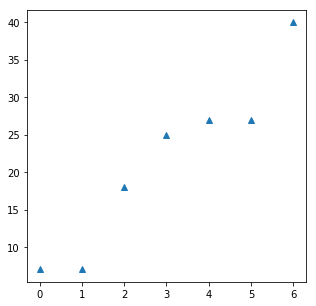

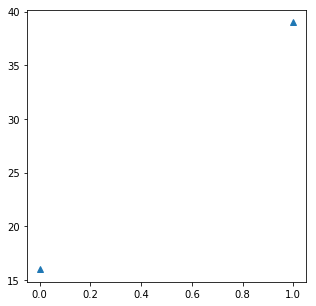

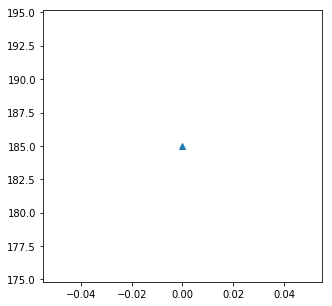

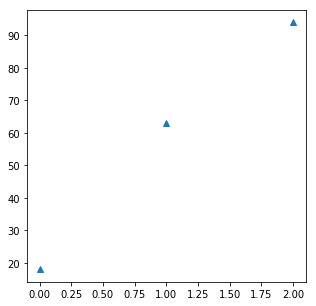

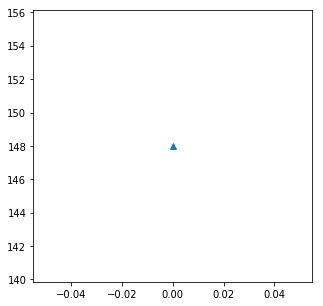

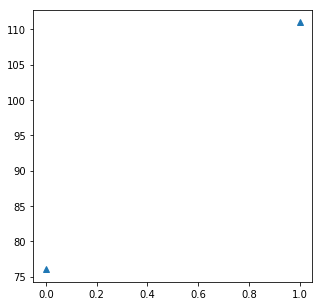

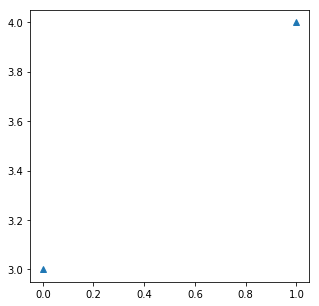

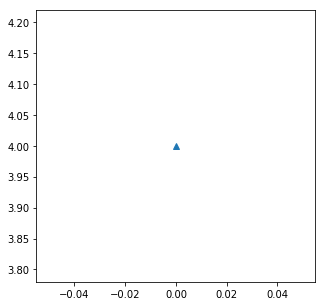

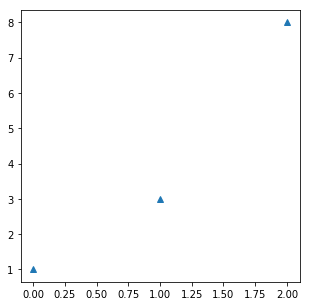

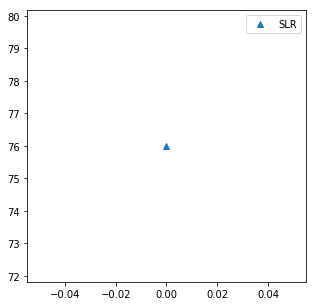

In [17]:
for weapon in Killed_list:
    num = len(Killed_list[weapon])
    plt.figure(figsize = (5,5))
    plt.plot(range(num), Killed_list[weapon],'^',label = weapon)
plt.legend()  

### Kill Data

In [18]:
whole = []
for i in range(6,24):
    data = [sheet.cell(row = j, column =i).value for j in range(1,83) if sheet.cell(row=j,column = i).value]
    weapon = data[0]
    average = data[1:3]
    distance = sorted(data[3:])
    whole.append((weapon,distance))
Kill_list = dict(whole)

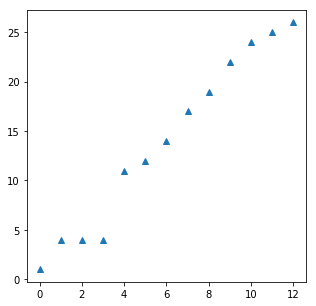

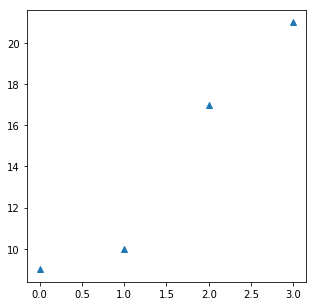

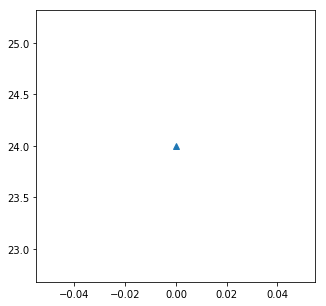

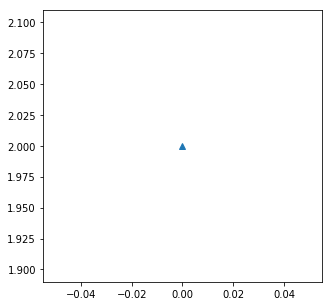

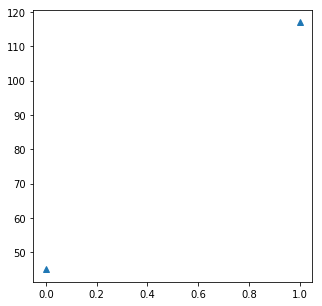

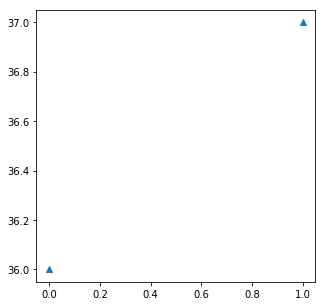

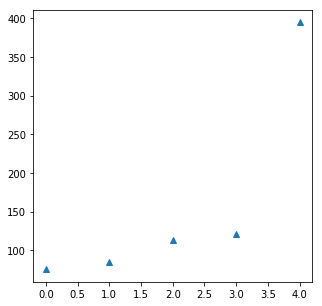

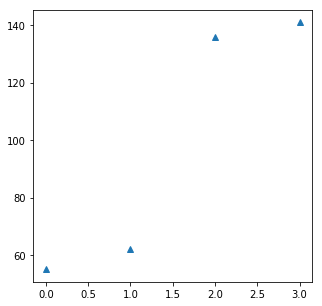

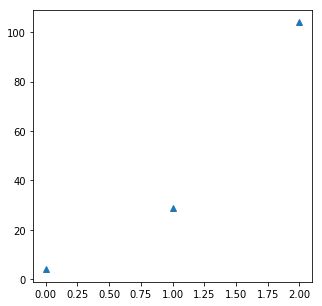

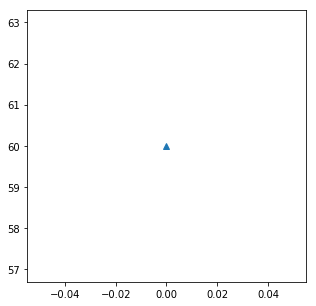

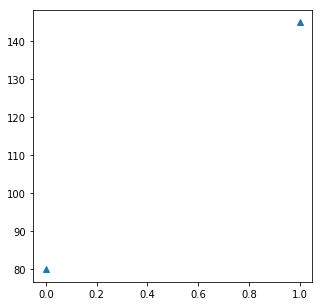

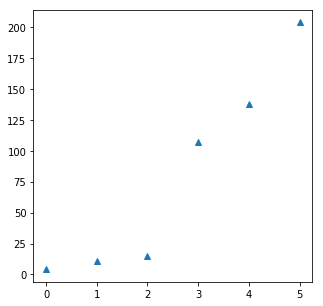

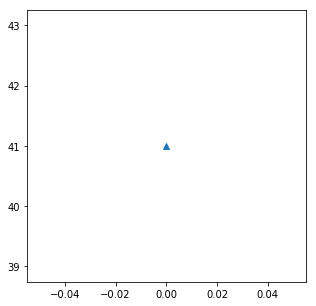

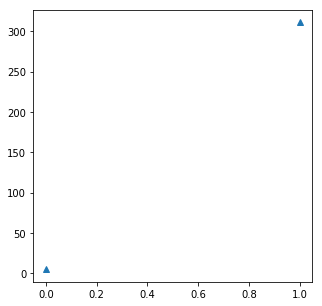

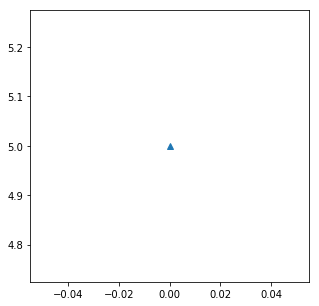

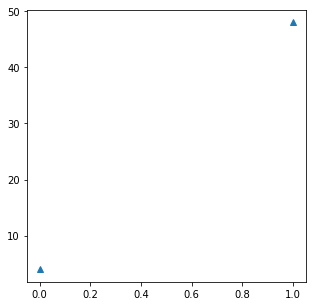

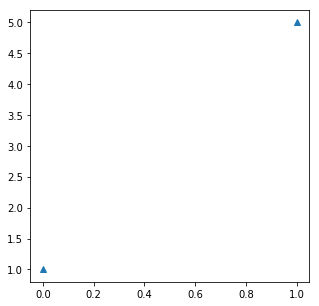

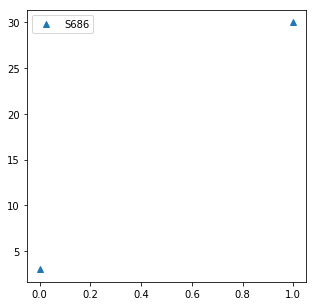

In [19]:
for weapon in Kill_list:
    num = len(Kill_list[weapon])
    plt.figure(figsize = (5,5))
    plt.plot(range(num), Kill_list[weapon],'^',label = weapon)
plt.legend()  

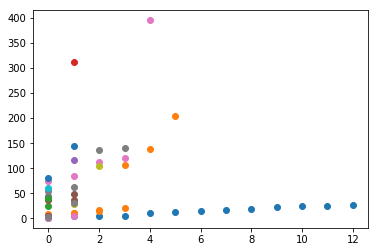

In [20]:
for weapon in Kill_list:
    num = len(Kill_list[weapon])
    plt.plot(range(num), Kill_list[weapon],'o',label = weapon)
#plt.legend()  shows the weapon name

In [21]:
import numpy as np
inter_weapon = [i for i in Killed_list if i in Kill_list]
inter_killed = np.array([Killed_list[i] for i in Killed_list if i in Kill_list])
inter_kill = np.array([Kill_list[i] for i in Killed_list if i in Kill_list])

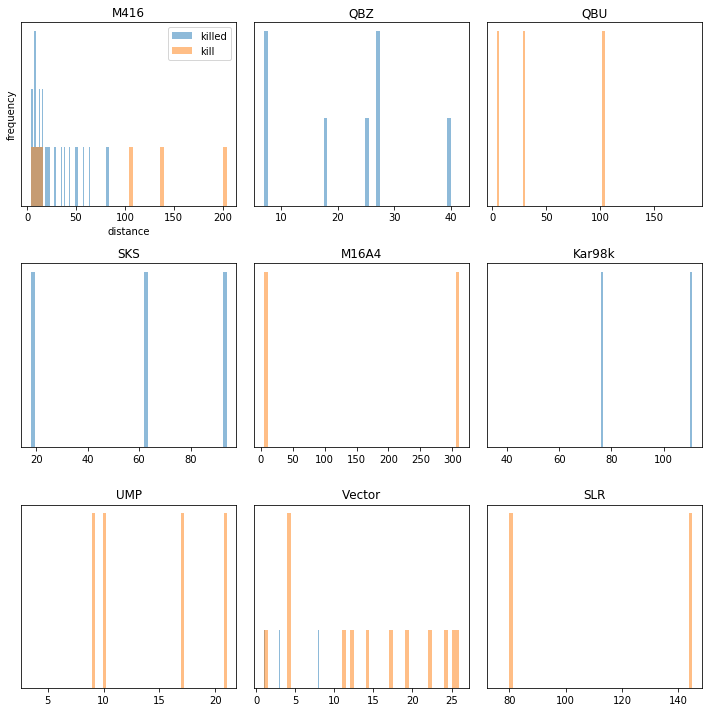

In [22]:
fig, axes = plt.subplots(3,3, figsize = (10,10))
ax = axes.ravel()
for i in range(9):
    _, bins = np.histogram(inter_kill[i], bins = 50)
    ax[i].hist(inter_killed[i], bins = 50, alpha = .5)
    ax[i].hist(inter_kill[i], bins = 50, alpha = .5)
    ax[i].set_title(inter_weapon[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('distance')
ax[0].set_ylabel('frequency')
ax[0].legend(['killed', 'kill'])
fig.tight_layout()

### 전체 거리 데이터

In [49]:
kill_distance = sorted([j for i in Kill_list.values() for j in i])
killed_distance = sorted([j for i in Killed_list.values() for j in i])

Text(0.5,1,'BattleGround Kill')

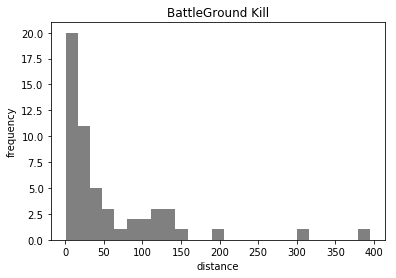

In [50]:
plt.hist(kill_distance, bins = 25, color = 'gray')
plt.ylabel('frequency')
plt.xlabel('distance')
plt.title('BattleGround Kill')

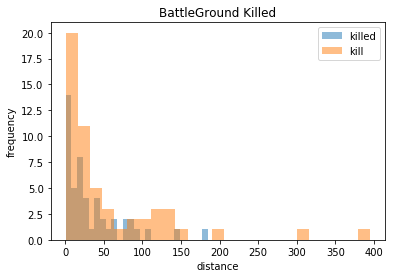

In [57]:
plt.hist(killed_distance, bins = 25, alpha = .5, label = 'killed')
plt.hist(kill_distance, bins = 25, alpha = .5, label = 'kill')
plt.ylabel('frequency')
plt.xlabel('distance')
plt.title('BattleGround Killed')
plt.legend()